CEI - Индекс подверженности кибербезопасности

GCI - Глобальный индекс кибербезопасности

NCSI - Национальный индекс кибербезопасности

DDL - Уровень цифрового развития

# Анализ выборки

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio

In [25]:
df = pd.read_csv('Cyber_security.csv')
df.head()

,Country,Region,CEI,GCI,NCSI,DDL
0,Afghanistan,Asia-Pasific,1.000,5.20,11.69,19.50
1,Albania,Europe,0.566,64.32,62.34,48.74
2,Algeria,Africa,0.721,33.95,33.77,42.81
3,Andorra,Europe,NaN,26.38,NaN,NaN
4,Angola,Africa,NaN,12.99,9.09,22.69


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  192 non-null    object 
 1   Region   192 non-null    object 
 2   CEI      108 non-null    float64
 3   GCI      190 non-null    float64
 4   NCSI     167 non-null    float64
 5   DDL      152 non-null    float64
dtypes: float64(4), object(2)
memory usage: 9.1+ KB


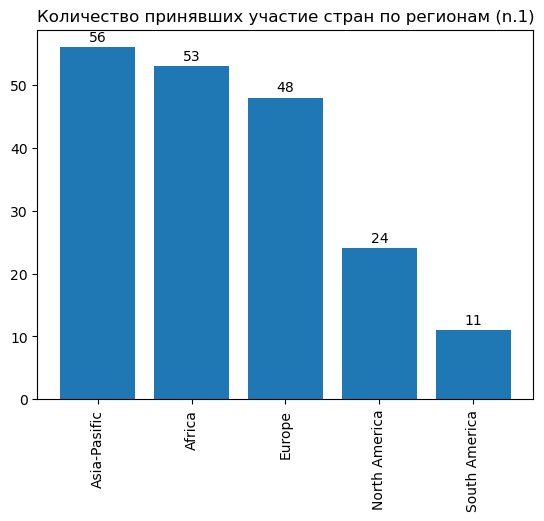

In [27]:
value_counts = df['Region'].value_counts()
plt.bar(value_counts.index, value_counts.values)
plt.title('Количество принявших участие стран по регионам (n.1)')
plt.xticks(rotation=90)
for i, v in enumerate(value_counts.values): #enumerate: i - индекс элемента value_counts, v - значение элемента
    plt.text(i, v+1, str(v), ha='center')
plt.show()

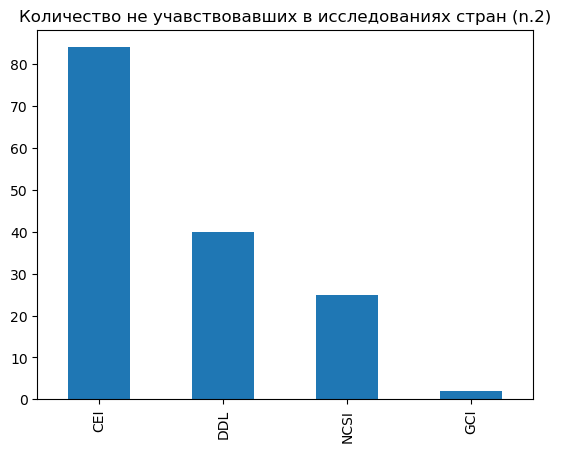

In [28]:
nan_values = df[["CEI", "DDL", "NCSI", "GCI"]].isna().sum()
nan_values.plot(kind='bar')
plt.title('Количество не учавствовавших в исследованиях стран (n.2)')
plt.show()
#Количество значений NaN

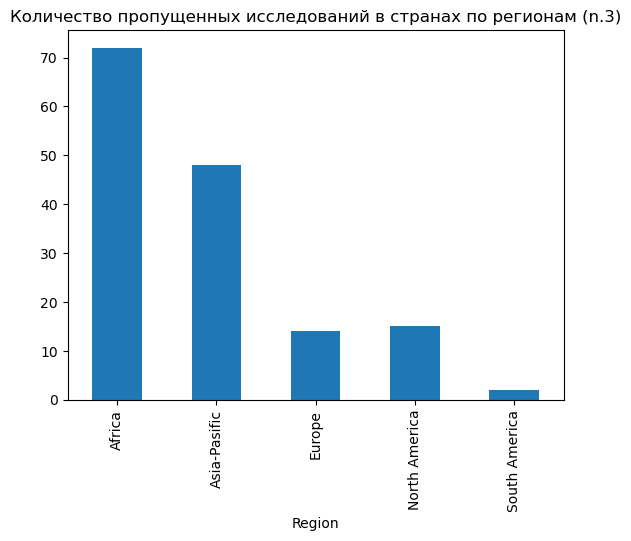

In [29]:
df['Number_of_NaNs'] = df[['CEI', 'GCI', 'NCSI', 'DDL']].isna().sum(1)
sum_of_values = df.groupby('Region')['Number_of_NaNs'].sum()
sum_of_values.plot(kind='bar')
plt.title('Количество пропущенных исследований в странах по регионам (n.3)')
plt.show()
#Распределение значений NaN по регионам
#промежуточный нерепрезентативный график - не учитывается количество стран принявших участие в исследованиях

Из этого графика можно понять, что , например, примерно 34% исследований было пропущено в Африке, а в Азии, несмотря на большее количество стран (56 к 53, график n.1), уровень вовлечённости в исследования сильно выше (всего 22% пропущенных странами исследований).

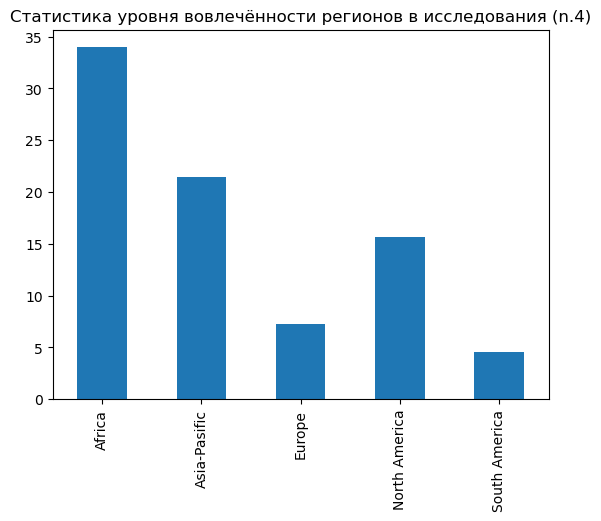

In [30]:
procent_nan = (sum_of_values / (value_counts * 4)) * 100
procent_nan.plot(kind='bar')
plt.title('Cтатистика уровня вовлечённости регионов в исследования (n.4)')
plt.show()
#Количество значений NaN по регионам в процентном соотношении к общему количеству значений

# Сравнение показателей

За незначительными отклонениями, по этому графику можно примерно оценивать уровень развития регионов в областе информационной безопасности. Более точно это сделанно в статистике DDL(график n.8)

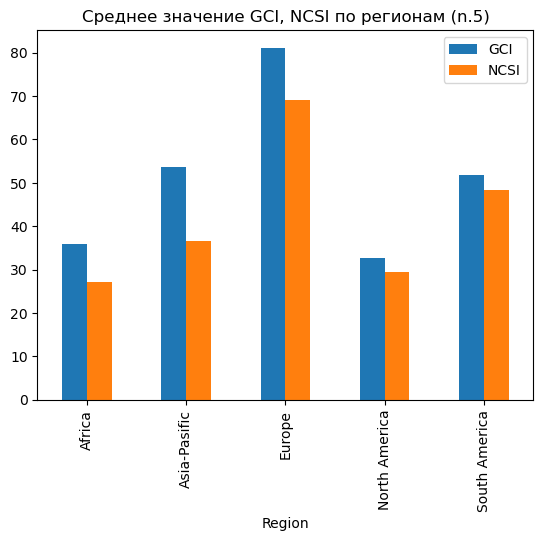

In [31]:
mean_value = df.groupby('Region')[['GCI', 'NCSI']].mean()
mean_value.plot(kind = 'bar')
plt.title('Среднее значение GCI, NCSI по регионам (n.5)')
plt.show()

Также можно сравнить наш ранее построенный график участия стран в исследованиях и уровень их подверженности киберприступности. Видим серьёзное отклонение у стран южной Америки. Основная причина этому - малое количество стран в регионе. Их 12, а в исследовании CEI участие принимали всего 9. Также если смотреть на сами страны, то они находятся примерно на одном уровне развития инфобеза(Если судить по исследованию DDL, график n.8). И по графикам ниже можно определить на каком: они уже активно участвуют в исследованиях, однако защита от киберпреступников ещё недостаточно развита, если сравнивать с той же Европой.

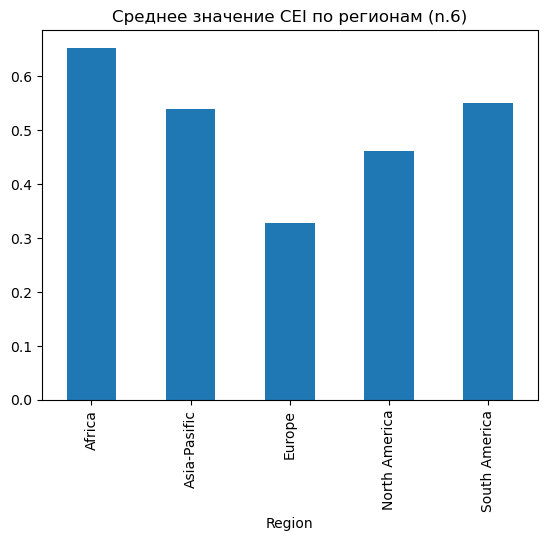

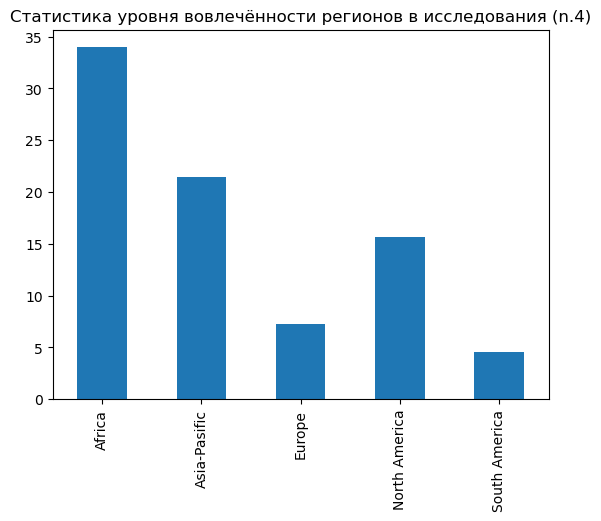

In [32]:
mean_cei = df.groupby('Region')['CEI'].mean()
mean_cei.plot(kind = 'bar')
plt.title('Среднее значение СEI по регионам (n.6)')
plt.show()

procent_nan.plot(kind='bar')
plt.title('Cтатистика уровня вовлечённости регионов в исследования (n.4)')
plt.show()

# Карты

In [33]:
import pycountry
list_country = df['Country'].to_list()
# Переписываем названия стран в ISO-3 формат
def get_iso3_country_from_location(location):
    try:
        country = pycountry.countries.search_fuzzy(location)[0]
        return country.alpha_3
    except LookupError:
        return ''
iso3_country_list = [get_iso3_country_from_location(location) for location in list_country]
#добавляем ISO-3 лист в df для простоты постройки карт
df['ISO_3'] = pd.Series(iso3_country_list)

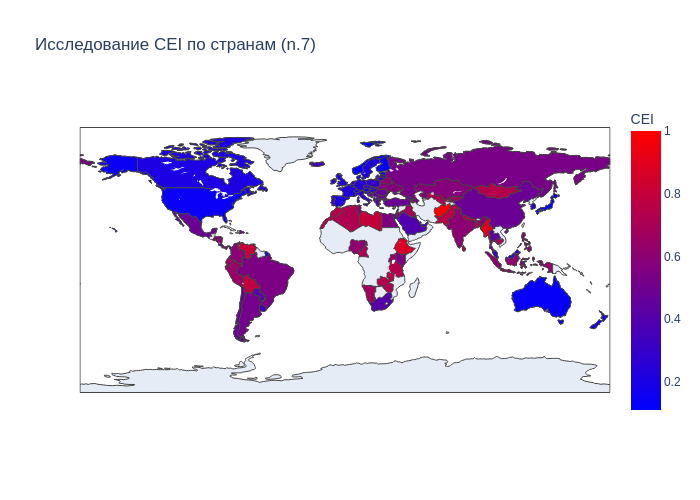

In [34]:
fig = px.choropleth(df, locations='ISO_3', color='CEI',
                    color_continuous_scale='bluered',
                    title='Исследование CEI по странам (n.7)')
#pio.show(fig)

#Показываем карту в формате png чтобы была возможность посмотреть её в гитхабе
pio.write_image(fig, 'choropleth_1.png')
from IPython.display import Image
Image(filename = 'choropleth_1.png')

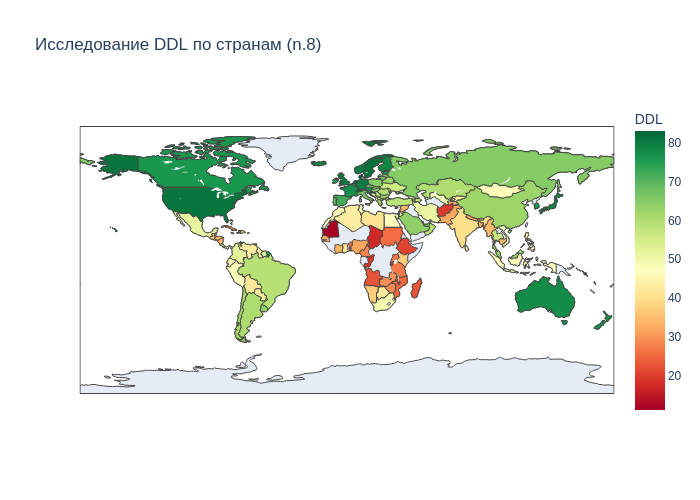

In [36]:
fig = px.choropleth(df, locations='ISO_3', color='DDL',
                    color_continuous_scale='RdYlGn',
                    title='Исследование DDL по странам (n.8)')
#pio.show(fig)

pio.write_image(fig, 'choropleth_2.png')
Image(filename = 'choropleth_2.png')